### Final Practice

### 1. Creating Multi qubit registers

In [1]:
from qiskit import * 
from qiskit.quantum_info import Statevector 
from qiskit.extensions import UnitaryGate 
%matplotlib inline 

In [11]:
qr1 = QuantumRegister(size = 4, name = 'myreg1')
qr2 = QuantumRegister(size = 2, name = 'myreg2')
qc = QuantumCircuit(qr1,qr2)

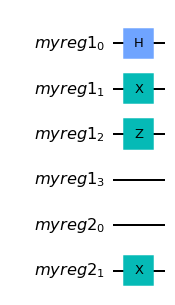

In [12]:
# doing some operations 

#1. single qubits of qregs 
qc.h(qr1[0])
qc.x(qr1[1])
# even when you have multiple registers, the indexing of qc is same
qc.z(2)
qc.x(qr2[1])
qc.draw('mpl')

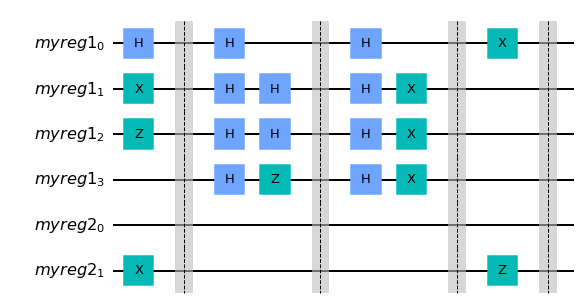

In [13]:
## Adding to the range of 
## 1. the quantum circuit
qc.barrier()
qc.h(range(3)) # providing a range of qc
qc.h([1,2,3]) # list of indices in qc
qc.z(3) # singlel qubit index
qc.barrier()

## 2. to the quantum register
qc.h(qr1) # whole of qr1 
qc.x(qr1[1:]) # starting from 1 to end
qc.barrier()
qc.x(qr1[-4:-3]) # reverse notation, appyling on the first qubit of qr1
qc.z(qr2[1]) # on a single qubit 
qc.barrier()

qc.draw('mpl')

In [55]:
qr1.z(0) # this can't be done as gates are defined on quantum circuits not registers
qc.draw('mpl')

AttributeError: 'QuantumRegister' object has no attribute 'z'

### 2. Measuring into classical registers
- Nice!! Can also add a register into a quantum circuit using **add_register**
- Measurements **measure_active** and **measure_all** have an inplace parameter which tells whether to return a new circuit (if False) or apply the measurements to the same circuit or not.

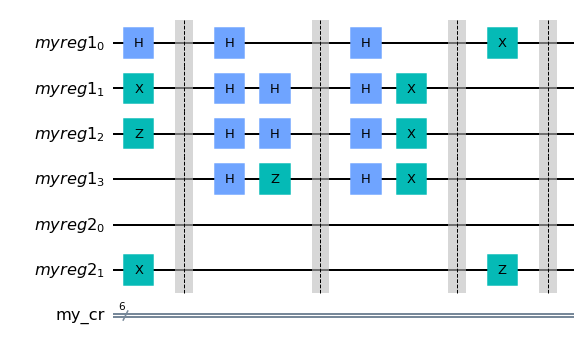

In [14]:
# let us add a classical register into our circuit definition
cr = ClassicalRegister(size = 6, name = 'my_cr')
qc.add_register(cr)
qc.draw('mpl')

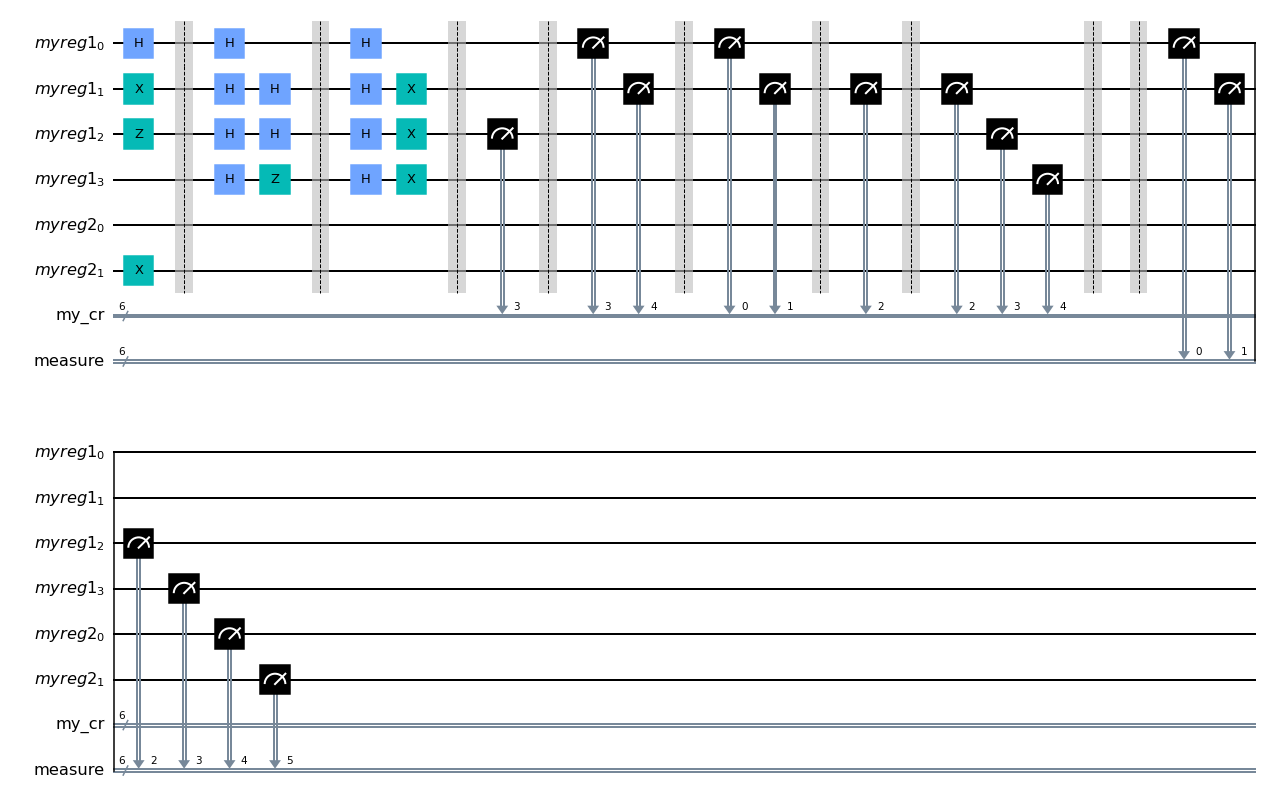

In [57]:
# let us try to measure the results of the circuit 
## 1. measuring single qubits into single classical bits
qc.measure(2,3) # measure qubit 3(ind 2) into 4(ind 3)
qc.barrier()
qc.measure([0,1], [3,4]) # measuring into single bits but collectively
qc.barrier()
qc.measure(range(2), range(2)) # measuring into a continuous range
qc.barrier()
qc.measure(qr1[1],cr[2]) # measuring into single bits of qregs
qc.barrier()
qc.measure(qr1[1:4], cr[2:5]) # measuring into a list of  bits of registers
qc.barrier()
qc.measure_active() # measures the non idle gates in  the circuit
# qc.measure_all() # creates a new classical register and adds a barrier before
qc.draw('mpl')

### 3. Using single qubit gates

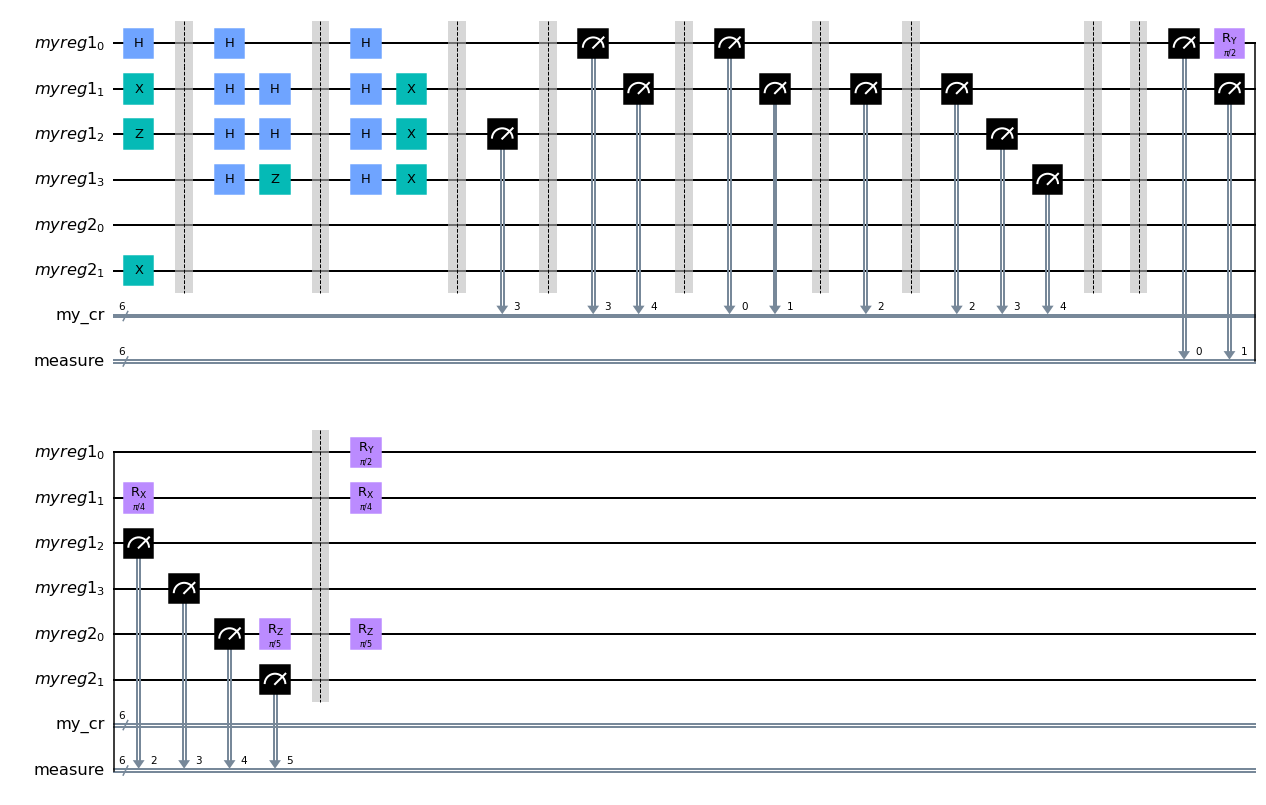

In [59]:
# using rx, etc. baaki it is done
qc.barrier()
qc.rx(np.pi/4,1)  # theta, qubit
qc.rz(np.pi/5,4)  # theta, qubit
qc.ry(np.pi/2,0)  # theta, qubit
qc.draw('mpl')

### using CX, CZ, CRZ, CRY, CRX, CZ gates

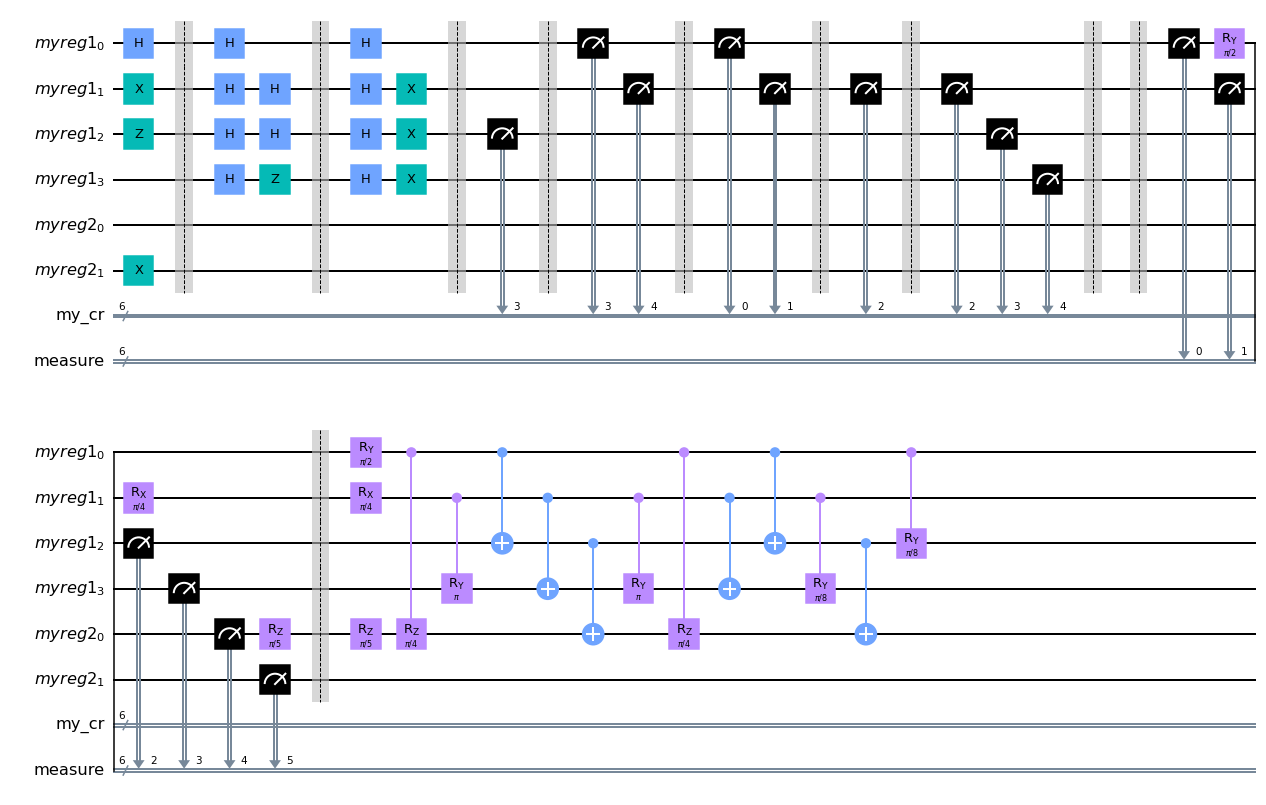

In [61]:
qc.crz(np.pi/4, 0,4) # theta to control to target
qc.cry(np.pi, 1, 3)  # theta to control to target
qc.cx([0,1,2],[2,3,4])# adding the CX list wise
                      # means 0 -> 2 par cx
                      # means 1 -> 3 par cx and so on...
qc.cry(np.pi/8, [0,1], [2,3]) # note: in the controlled gates 
                              # you may also give a list of the 
                              # qubit indices
qc.draw('mpl')

### Multicontrolled
- The MCRX, MCRY, MCRZ have the form of 
    - mcr' '(theta, control_qubits, target_qubit)
- The MCMT gates are Multi controlled, multi target
- The MCT are Multi control single target gates 

In [71]:
# can also make the custom controlled gates
qc2 =QuantumCircuit(2,name='my_circ')
qc2.x(0)
qc2.h(1)

# nice -> structure of the control state parameter is very
# important - you need to see that 0th index corresponds to 
# the last qubit and last index to the first qubit

qc2 = qc2.control(num_ctrl_qubits = 3, ctrl_state = '110',label = 'CU')

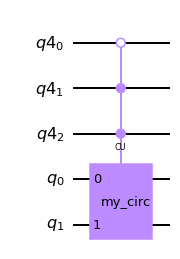

In [73]:
qc2.draw('mpl')

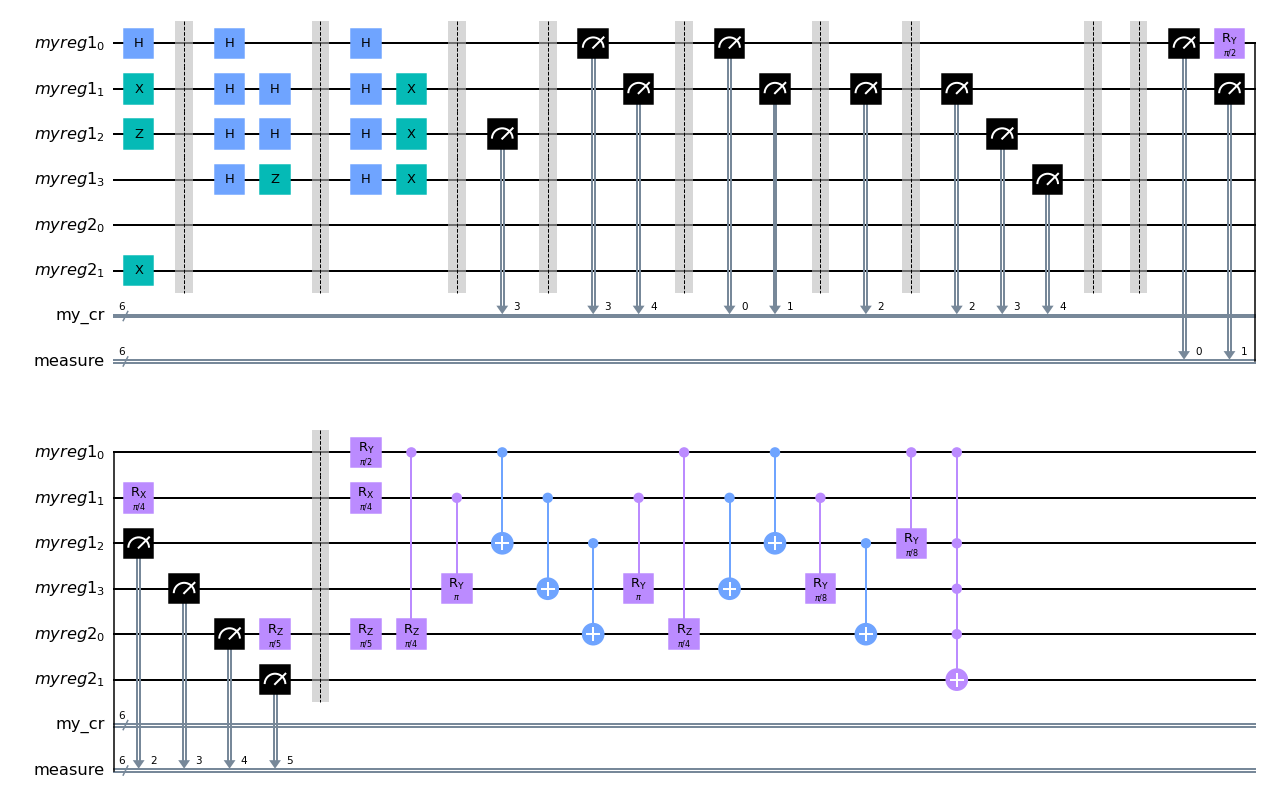

In [75]:
# using MCT gates
qc.mct([0,2,3,4],5)
qc.draw('mpl')

In [78]:
qc.barrier(range(6))
qc.mcx([0,1,2],4) # cool , use a 3-qubit control

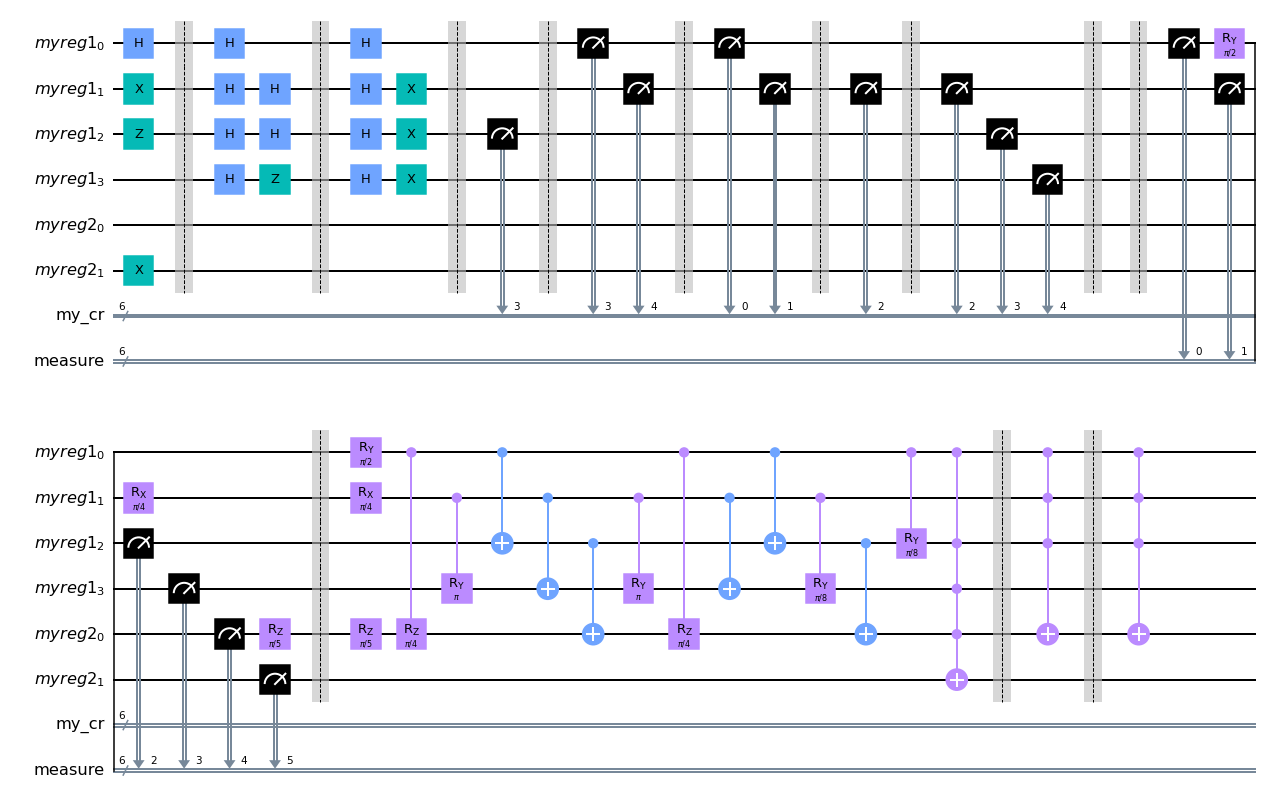

In [79]:
qc.draw('mpl')

### Barrier operations
- **barrier** operation can be used as - 
    - on single qubit
    - on list of qubit indices
    - on the whole circuit
    - on the whole q reg
    - on a subset of the q reg

In [83]:
# use the barrier operations
qc.barrier()         # on the whole circuit
qc.barrier(qr1)      # on the whole first qreg 
qc.barrier(qr2[0])   # on the first qubit of the second qreg
qc.barrier(qr1[1:3]) # on a subset of the first qreg

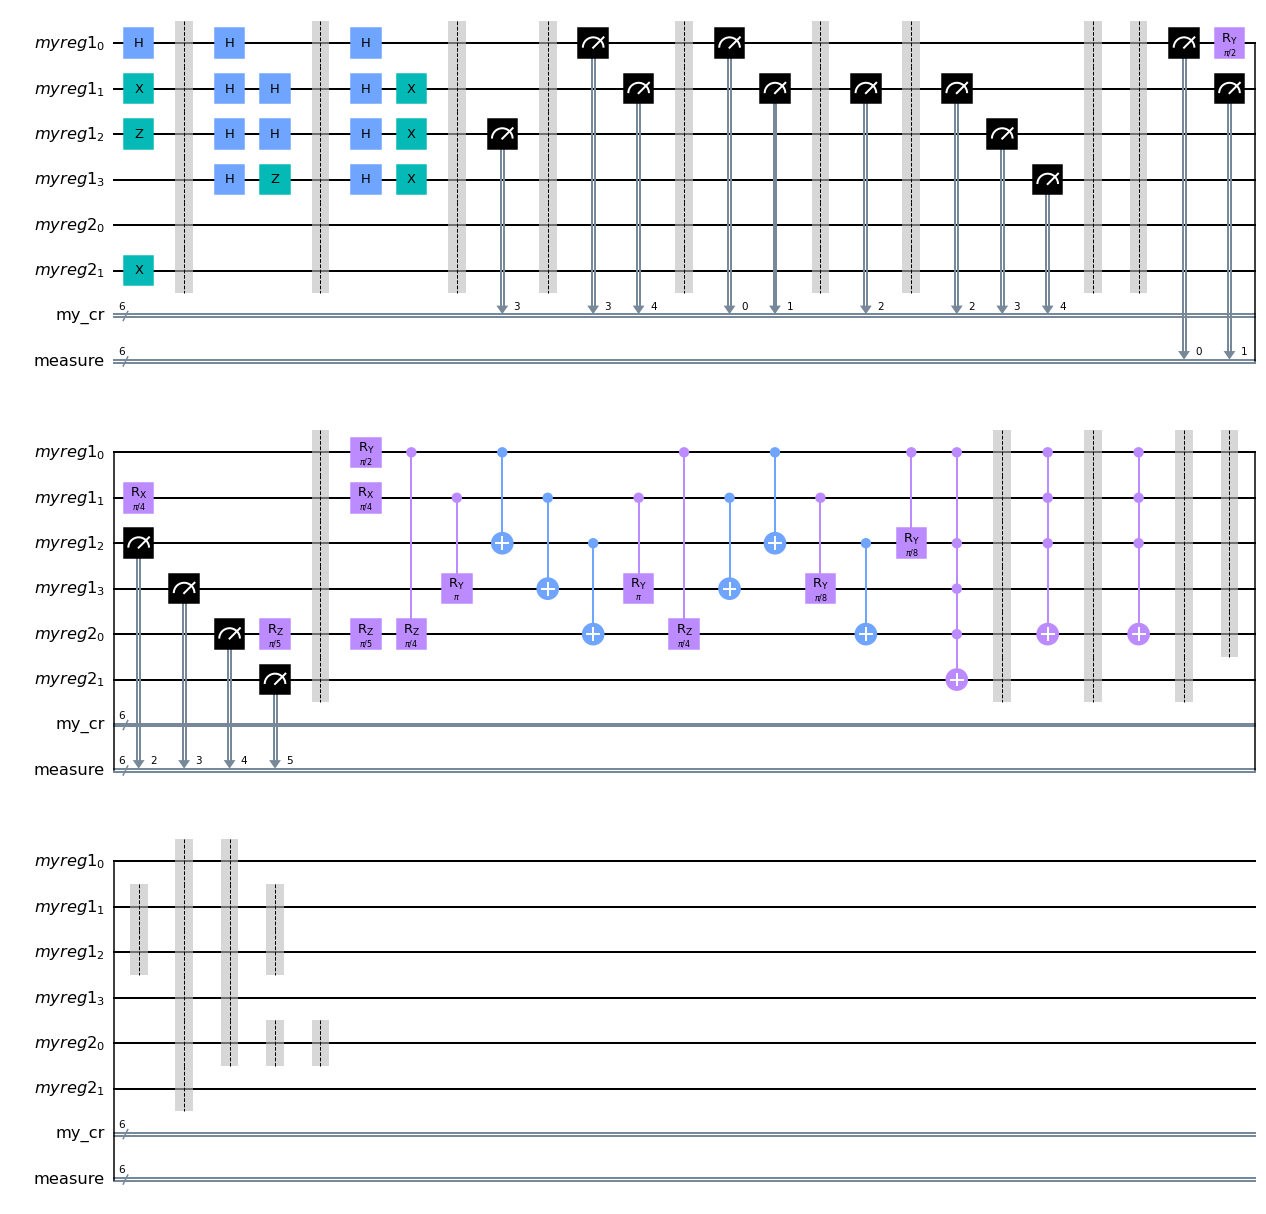

In [86]:
qc.barrier(4) # on a single bit of the quantum circuit
qc.draw('mpl')

### Circuit depth

In [15]:
print(qc.depth()) # getting back the depth of the circuit, note
                  # finding out depth is the method which you
                  # studied, remember it!

6


In [92]:
print(qc.count_ops())
print(qc.data)

OrderedDict([('barrier', 22), ('measure', 15), ('h', 11), ('cx', 6), ('x', 5), ('cry', 4), ('mcx', 3), ('z', 2), ('rx', 2), ('rz', 2), ('ry', 2), ('crz', 2)])
[(<qiskit.circuit.library.standard_gates.h.HGate object at 0x00000180706BC9C8>, [Qubit(QuantumRegister(4, 'myreg1'), 0)], []), (<qiskit.circuit.library.standard_gates.x.XGate object at 0x00000180706B8C48>, [Qubit(QuantumRegister(4, 'myreg1'), 1)], []), (<qiskit.circuit.library.standard_gates.z.ZGate object at 0x00000180706BCC48>, [Qubit(QuantumRegister(4, 'myreg1'), 2)], []), (<qiskit.circuit.library.standard_gates.x.XGate object at 0x00000180706BCDC8>, [Qubit(QuantumRegister(2, 'myreg2'), 1)], []), (<qiskit.circuit.barrier.Barrier object at 0x00000180704A7D48>, [Qubit(QuantumRegister(4, 'myreg1'), 0), Qubit(QuantumRegister(4, 'myreg1'), 1), Qubit(QuantumRegister(4, 'myreg1'), 2), Qubit(QuantumRegister(4, 'myreg1'), 3), Qubit(QuantumRegister(2, 'myreg2'), 0), Qubit(QuantumRegister(2, 'myreg2'), 1)], []), (<qiskit.circuit.library.

### Combining quantum ciruits
- There are three main methods to combine qcs 
    - qc1 + qc2 when you have equal sized circuits
        - HERE : qregs need to be of the same size, else error
        - Also, if present in both, cregs also need to be the same size
    - qc1.append(qc2) when you want to append a circuit to the first - returns **instruction**, can't use  **front** parameter
    - qc1.compose(qc2) when you want flexibility on the mapping of the qubits - returns **circuit**

In [16]:
qc1 = QuantumCircuit(3)
qc1.h(0)

qc2 = QuantumCircuit(4)
qc2.x([0,2,3])

qc2.append(qc1, qargs = [1,0,3]) # means qc1 ka 0th qubit is 
                                 # being mapped to the first
                                 # qubit of qc2 and so on...

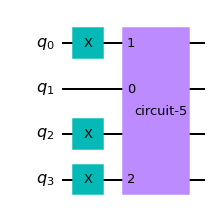

In [17]:
qc2.draw('mpl')

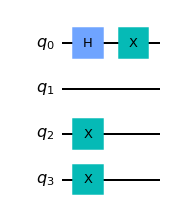

In [29]:
qc1 = QuantumCircuit(3)
qc1.h(0)

qc2 = QuantumCircuit(4)
qc2.x([0,2,3])

# this method is particularly useful for direct qubit 
# mapping, 4 len mei first 3 mei 3 len ka circuit

qc2 = qc2.compose(qc1, front = True)
qc2.draw('mpl')

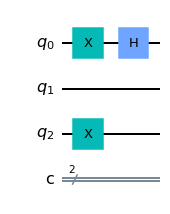

In [34]:
qc1 = QuantumCircuit(3,2)
qc1.h(0)

qc2 = QuantumCircuit(3,2)
qc2.x([0,2])

# either exact definitions, or one of them doesn't contain
# cr or qr
qc2 = qc2 + qc1 
qc2.draw('mpl')

### Returning the open qasm 
- We can -
    - form a QC from qasm file
    - form a QC from qasm string
    - form the qasm str of a QC
    - form the qasm file for the QC
- Note : formatted = True **does not return the string**
- only when formatted = False is the string returned


In [131]:
print(qc.qasm(formatted = True))

qasm_str = qc1.qasm(formatted= False) 
qc1.qasm(filename='qasm_prac.qasm')
qasm_str 

OPENQASM 2.0;
include "qelib1.inc";
qreg myreg1[4];
qreg myreg2[2];
creg my_cr[6];
creg measure[6];
h myreg1[0];
x myreg1[1];
z myreg1[2];
x myreg2[1];
barrier myreg1[0],myreg1[1],myreg1[2],myreg1[3],myreg2[0],myreg2[1];
h myreg1[0];
h myreg1[1];
h myreg1[2];
h myreg1[1];
h myreg1[2];
h myreg1[3];
z myreg1[3];
barrier myreg1[0],myreg1[1],myreg1[2],myreg1[3],myreg2[0],myreg2[1];
h myreg1[0];
h myreg1[1];
h myreg1[2];
h myreg1[3];
x myreg1[1];
x myreg1[2];
x myreg1[3];
barrier myreg1[0],myreg1[1],myreg1[2],myreg1[3],myreg2[0],myreg2[1];
measure myreg1[2] -> my_cr[3];
barrier myreg1[0],myreg1[1],myreg1[2],myreg1[3],myreg2[0],myreg2[1];
measure myreg1[0] -> my_cr[3];
measure myreg1[1] -> my_cr[4];
barrier myreg1[0],myreg1[1],myreg1[2],myreg1[3],myreg2[0],myreg2[1];
measure myreg1[0] -> my_cr[0];
measure myreg1[1] -> my_cr[1];
barrier myreg1[0],myreg1[1],myreg1[2],myreg1[3],myreg2[0],myreg2[1];
measure myreg1[1] -> my_cr[2];
barrier myreg1[0],myreg1[1],myreg1[2],myreg1[3],myreg2[0],myreg2[1

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[3];\nh q[0];\n'

In [132]:
qc_qasm = QuantumCircuit.from_qasm_str(qasm_str = qasm_str)
qc_qasm = QuantumCircuit.from_qasm_file(path= 'qasm_prac.qasm')

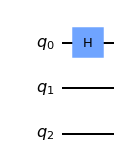

In [133]:
qc_qasm.draw('mpl')

In [134]:
qc1 == qc_qasm 

True

## Operators

In [1]:
from qiskit.quantum_info.operators import Operator 

In [4]:
# Operator is like a matrix 
# can be init in many ways...
## 1. through a matrix

op = Operator([[0,1],
              [1,0]])
op.data 

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

- **Two important properties** 
    - data : the data(matrix) of the operator
    - dims : the number of dimensions of the operator

- **NOTE** : the dimensions need not be $2^n \times 2^n$, they may also be  $2^m \times 2^n$ 
- **NOTE** : we can use the *Operator class* as a unitary simulator to compute the final unitary matrix for a quantum circuit, without having to call a simulator backend. 

## Be vary!
- Operators are like **Gates** - measure, reset, conditional operations, or a gate that does not have a matrix definition or decomposition in terms of gate with matrix definitions are a no-no

In [8]:
op = Operator.from_label('XXZ') # means X on qubit 3, X on qubit 2, Z on qubit 1 
op  

Operator([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
           -1.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))

In [9]:
from qiskit import * 
qc = QuantumCircuit(2)
qc.h([0,1])

op2 = Operator(qc)
op2.data 

array([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
       [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]])

- Can also be used in circuits just like QuantumCircuits
- Can be **appended and composed** just like gates and circuits

### Tensor products
- During **from_label()** init, we can also specify the operators and get the tensor products - $X \otimes Z$ is Operator.from_label('XZ')
- Can also manually do tensor products of two operators
- A.tensor(B) is equivalent to writing $A \otimes B$
- Also, A.expand(B) is equivalent to writing $ B \otimes A$

In [10]:
from qiskit.quantum_info.operators import Pauli 
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.tensor(B)

Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

### Multiplying
- A.compose(B) means reverse - $B.A$